In [11]:
import pandas as pd
import matplotlib.pyplot as plt
# 1 2 3 5 10 11 12 13 14 15 16 17 18 21 22 24 26
file_path = r'g:\programming\lab2\NationalNames.csv'
data = pd.read_csv(file_path)

print("Перші 8 рядків:")
print(data.head(8))

Перші 8 рядків:
   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414


In [3]:
# 2. Виведіть останні 8 рядків набору даних
print("\nОстанні 8 рядків:")
print(data.tail(8))



Останні 8 рядків:
              Id     Name  Year Gender  Count
1825425  1825426       Zo  2014      M      5
1825426  1825427    Zyeir  2014      M      5
1825427  1825428     Zyel  2014      M      5
1825428  1825429   Zykeem  2014      M      5
1825429  1825430   Zymeer  2014      M      5
1825430  1825431  Zymiere  2014      M      5
1825431  1825432    Zyran  2014      M      5
1825432  1825433    Zyrin  2014      M      5


In [4]:
# 3. Отримайте імена стовпців набору даних
print("\nІмена стовпців:")
print(data.columns)


Імена стовпців:
Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')


In [5]:
# 5. Знайдіть кількість унікальних імен
unique_names = data['Name'].nunique()
print(f"\nКількість унікальних імен: {unique_names}")


Кількість унікальних імен: 93889


## # 10. Підрахуйте кількість унікальних імен у кожному році
unique_names_per_year = data.groupby('Year')['Name'].nunique()
print("\nКількість унікальних у кожному році:")
print(unique_names_per_year)

In [8]:
# 11. Знайдіть рік із найбільшою кількістю унікальних імен
year_most_unique = unique_names_per_year.idxmax()
most_unique_names_count = unique_names_per_year.max()
print(f"\nРік із найбільшою кількістю унікальних імен: {year_most_unique}, кількість імен{most_unique_names_count}")


Рік із найбільшою кількістю унікальних імен: 2008, кількість імен32488


In [9]:
# 12. Найпопулярніше ім’я в році з найбільшою кількістю унікальних імен
most_unique_year_data = data[data['Year'] == year_most_unique]
most_popular_name = most_unique_year_data.loc[most_unique_year_data['Count'].idxmax(), 'Name']
print(f"\nНайпопулярніше ім’я у {year_most_unique} році: {most_popular_name}")


Найпопулярніше ім’я у 2008 році: Jacob


In [10]:
# 13. Рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих імен
jacob_female_data = data[(data['Name'] == 'Jacob') & (data['Gender'] == 'F')]
jacob_female_year = jacob_female_data.loc[jacob_female_data['Count'].idxmax(), 'Year']
print(f"\nРік, коли ім’я 'Jacob' було найпопулярнішим серед жіночих імен: {jacob_female_year}")


Рік, коли ім’я 'Jacob' було найпопулярнішим серед жіночих імен: 2004


In [22]:
# 14. Рік із найбільшою кількістю гендерно-нейтральних імен
gender_neutral = data.groupby(['Year', 'Name'])['Gender'].nunique()
gender_neutral_counts = gender_neutral[gender_neutral > 1].groupby('Year').size()
gender_neutral_year = gender_neutral_counts.idxmax()
gender_neutral_count = gender_neutral_counts.max()
print(f"\nРік із найбільшою кількістю гендерно-нейтральних імен: {gender_neutral_year}")
print(f"Кількість гендерно-нейтральних імен у цьому році: {gender_neutral_count}")


Рік із найбільшою кількістю гендерно-нейтральних імен: 2008
Кількість гендерно-нейтральних імен у цьому році: 2557


In [12]:
# 15. Загальна кількість народжень за рік
births_per_year = data.groupby('Year')['Count'].sum()
print("\nЗагальна кількість народжень за рік:")
print(births_per_year)


Загальна кількість народжень за рік:
Year
1880     201484
1881     192699
1882     221538
1883     216950
1884     243467
         ...   
2010    3686589
2011    3646730
2012    3643336
2013    3626802
2014    3670151
Name: Count, Length: 135, dtype: int64


In [13]:
# 16. Рік, коли народилося найбільше дітей
year_most_births = births_per_year.idxmax()
print(f"\nРік, коли народилося найбільше дітей: {year_most_births}")



Рік, коли народилося найбільше дітей: 1957


In [14]:
# 17. Кількість дівчаток та хлопчиків, які народились кожного року
gender_counts_per_year = data.groupby(['Year', 'Gender'])['Count'].sum().unstack()
print("\nКількість дівчаток та хлопчиків, які народились кожного року:")
print(gender_counts_per_year.head())


Кількість дівчаток та хлопчиків, які народились кожного року:
Gender       F       M
Year                  
1880     90993  110491
1881     91954  100745
1882    107850  113688
1883    112321  104629
1884    129022  114445


In [15]:
# 18. Кількість років, коли дівчаток народжувалось більше, ніж хлопчиків
years_more_girls = (gender_counts_per_year['F'] > gender_counts_per_year['M']).sum()
print(f"\nКількість років, коли дівчаток народжувалось більше, ніж хлопчиків: {years_more_girls}")


Кількість років, коли дівчаток народжувалось більше, ніж хлопчиків: 54


In [16]:
# 21. Скільки разів хлопчиків називали Barbara
barbara_male_count = data[(data['Name'] == 'Barbara') & (data['Gender'] == 'M')]['Count'].sum()
print(f"\nКількість хлопчиків з ім’ям 'Barbara': {barbara_male_count}")


Кількість хлопчиків з ім’ям 'Barbara': 4139


In [17]:
# 22. Кількість років спостереження
years_of_data = data['Year'].nunique()
print(f"\nКількість років спостереження: {years_of_data}")


Кількість років спостереження: 135


In [10]:
# 24. Найпопулярніше серед непопулярних імен
least_popular_names = data.groupby('Name')['Count'].sum().nsmallest(160)
most_popular_of_least = least_popular_names.idxmax()
most_popular_count = least_popular_names.max()

print(f"\nНайпопулярніше серед непопулярних імен: {most_popular_of_least}, його використовували {most_popular_count} разів")



Найпопулярніше серед непопулярних імен: Aabid, його використовували 5 разів


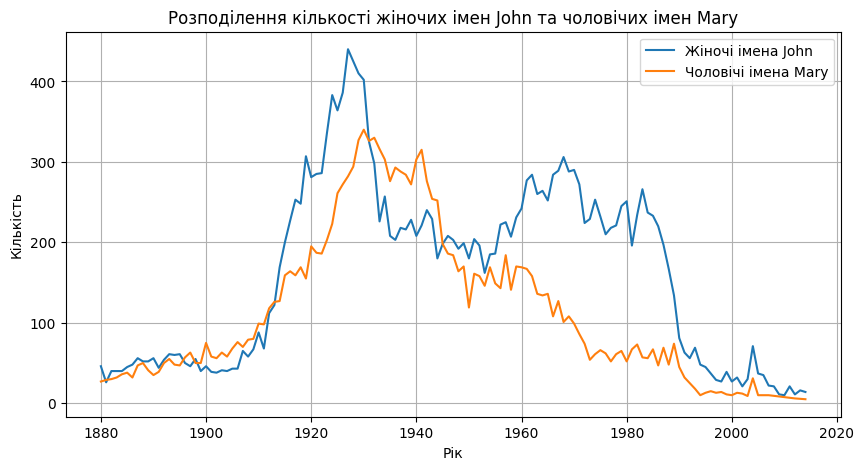

In [21]:
# 26. Графік розподілення кількості жіночих імен John та чоловічих імен Mary
john_female = data[(data['Name'] == 'John') & (data['Gender'] == 'F')].groupby('Year')['Count'].sum()
mary_male = data[(data['Name'] == 'Mary') & (data['Gender'] == 'M')].groupby('Year')['Count'].sum()

plt.figure(figsize=(10, 5))
plt.plot(john_female, label="Жіночі імена John")
plt.plot(mary_male, label="Чоловічі імена Mary")
plt.title("Розподілення кількості жіночих імен John та чоловічих імен Mary")
plt.xlabel("Рік")
plt.ylabel("Кількість")
plt.legend()
plt.grid(True)
plt.show()
